In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from sklearn import model_selection
import matplotlib.pyplot as plt
import random

## 5.3.1 The Validation Set Approach

In [3]:
Auto = pd.read_table("Auto.csv", sep = ',')
Auto

Unnamed: 0   mpg  cylinders  displacement  horsepower  weight  \
0             1  18.0          8         307.0         130    3504   
1             2  15.0          8         350.0         165    3693   
2             3  18.0          8         318.0         150    3436   
3             4  16.0          8         304.0         150    3433   
4             5  17.0          8         302.0         140    3449   
..          ...   ...        ...           ...         ...     ...   
387         393  27.0          4         140.0          86    2790   
388         394  44.0          4          97.0          52    2130   
389         395  32.0          4         135.0          84    2295   
390         396  28.0          4         120.0          79    2625   
391         397  31.0          4         119.0          82    2720   

     acceleration  year  origin                       name  
0            12.0    70       1  chevrolet chevelle malibu  
1            11.5    70       1          buick skylark 320  
2            11.0    70       1         plymouth satellite  
3            12.0    70       1              amc rebel sst  
4            10.5    70       1                ford torino  
..            ...   ...     ...                        ...  
387          15.6    82       1            ford mustang gl  
388          24.6    82       2                  vw pickup  
389          11.6    82       1              dodge rampage  
390          18.6    82       1                ford ranger  
391          19.4    82       1                 chevy s-10  

[392 rows x 10 columns]

In [4]:
random.seed(1) ## two "random"s, random and np.random
train = random.sample(list(range(392)), 196)
test = set(list(range(392)))-set(train)
print(len(list(test)))
print (Auto.horsepower[list(test)])

196
7      215
8      225
10     170
12     150
19      46
      ... 
383    112
385     84
387     86
389     84
390     79
Name: horsepower, Length: 196, dtype: int64


In [5]:
regr = sm.ols(formula = 'mpg ~  horsepower', data = Auto, subset = train).fit()
print(regr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     375.1
Date:                Mon, 01 Nov 2021   Prob (F-statistic):           3.22e-47
Time:                        20:49:29   Log-Likelihood:                -580.53
No. Observations:                 196   AIC:                             1165.
Df Residuals:                     194   BIC:                             1172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.1224      0.971     42.366      0.0

In [6]:
mse_bias = np.mean((Auto.mpg - regr.predict(Auto.horsepower))[list(test)]**2)
print((Auto.mpg - regr.predict(Auto.horsepower))[list(test)])
print(mse_bias)

7       8.722288
8      10.389485
10      2.219901
12     -1.114493
19     -7.453341
         ...    
383    -0.449841
385     8.882007
387     0.215447
389     4.882007
390     0.048409
Length: 196, dtype: float64
26.367613581132478


In [7]:
def poly(y, x, p):
    f = y
    f += ' ~ '
    for i in range(1,p+1):
        f += 'np.power(' + x + ',' + str(i) + ')'
        if i != p:
            f += '+'
            
    return f

In [10]:
regr2 = sm.ols(formula = poly('mpg', 'horsepower', 2), data = Auto, subset = train).fit()
#print(regr2.summary())
mse_bias2 = np.mean((Auto.mpg - regr2.predict(Auto.horsepower))[list(test)]**2)
print(mse_bias2)

21.911808962635813


In [12]:
regr3 = sm.ols(formula = poly('mpg', 'horsepower', 3), data = Auto, subset = train).fit()
#print(regr2.summary())
mse_bias3 = np.mean((Auto.mpg - regr3.predict(Auto.horsepower))[list(test)]**2)
print(mse_bias3)

21.87248481227061


In [16]:
random.seed(2)
train = random.sample(list(range(392)), 196)
test = set(list(range(392)))-set(train)

In [17]:
regr = sm.ols(formula = 'mpg ~  horsepower', data = Auto, subset = train).fit()
print(regr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     354.8
Date:                Mon, 01 Nov 2021   Prob (F-statistic):           1.10e-45
Time:                        20:53:01   Log-Likelihood:                -582.93
No. Observations:                 196   AIC:                             1170.
Df Residuals:                     194   BIC:                             1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.5091      0.968     41.849      0.0

In [18]:
mse_bias = np.mean((Auto.mpg - regr.predict(Auto.horsepower))[list(test)]**2)
print(mse_bias)

25.63453650501748


In [19]:
regr2 = sm.ols(formula = poly('mpg', 'horsepower', 2), data = Auto, subset = train).fit()
#print(regr2.summary())
mse_bias2 = np.mean((Auto.mpg - regr2.predict(Auto.horsepower))[list(test)]**2)
print(mse_bias2)

21.055548550718168


In [20]:
regr3 = sm.ols(formula = poly('mpg', 'horsepower', 3), data = Auto, subset = train).fit()
#print(regr2.summary())
mse_bias3 = np.mean((Auto.mpg - regr3.predict(Auto.horsepower))[list(test)]**2)
print(mse_bias3)

20.99241594062432


## Leave-One-Out Cross-Validation

In [19]:
regr_glm = sm.glm(formula = 'mpg ~  horsepower', data = Auto).fit()
print(regr_glm.params)

Intercept     39.935861
horsepower    -0.157845
dtype: float64


In [32]:
regr_lm = sm.ols(formula = 'mpg ~  horsepower', data = Auto).fit()
print(regr_lm.params)

Intercept     39.935861
horsepower    -0.157845
dtype: float64


In [33]:
def getXname(formula):
    Lis_name = []
    n = len(formula)
    i = 0
    
    while i < n:
        if formula[i] != '(':
            i += 1
        elif formula[i] == '(':
            j = i+1
            name = str()
            while formula[j] != ',':
                name += formula[j]
                j += 1
                
            Lis_name.append(name)
            i = j
            
    return list(set(Lis_name))

In [21]:
def loocv(data, model):
    n = len(data)
    total = set(range(n))
    err = 0
    yname = model.endog_names
    xname = model.exog_names[1]
    for i in range(n):
        train = list(total - set([i]))
        model.data.frame = data.iloc[train,:]
        regr = model.fit()
        X = data[xname].iloc[i]
        X = np.array([1, X])
        y = data[yname].iloc[i]
        pred = np.dot(regr.params.values, X)
        err += (y - pred)**2
        
    return err/n

In [22]:
regr_glm = sm.glm(formula = 'mpg ~  horsepower', data = Auto)
print(loocv(Auto, regr_glm))

23.943662938603115


In [36]:
regr_glm.exog_names

['Intercept', 'horsepower']

In [37]:
def getPower(formula):
    n = len(formula)
    pos = n-1
    while formula[pos-1] != ',':
        pos -= 1
    p = int(formula[pos:(n-1)])
    
    return p     

In [38]:
def polyloocv(data, model):
    n = len(data)
    total = set(range(n))
    err = 0
    yname = model.endog_names
    xname = getXname(model.formula)
    p = getPower(model.formula)
    x = data[xname].values
    X = np.ones([n,1])
    y = data[yname].values

    for j in range(1,p+1):
        X = np.hstack((X, x**j))

    for i in range(n):
        train = list(total - set([i]))
        model.data.frame = data.iloc[train,:]
        regr = model.fit()
        X_test = X[i]
        y_test = y[i]
        pred = np.dot(regr.params.values, X_test)
        err += (y_test - pred)**2
        
    return err/n

In [39]:
cv_err = []
for i in range(1,6):  ## range(1,6) is 1,2,3,4,5; range(1,5) is 1,2,3,4; differs from R
    regr_glm = sm.glm(formula = poly('mpg', 'horsepower', i), data = Auto)
    cv_err.append(polyloocv(Auto, regr_glm))
    
print(cv_err)

[23.943662938603115, 18.98476890761722, 18.94498981448593, 18.876333244865016, 18.426968587907247]


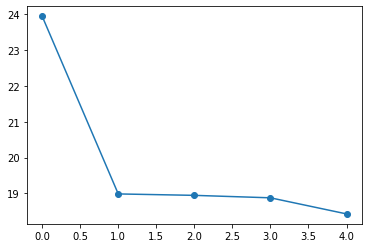

In [40]:
plt.scatter(range(len(cv_err)), cv_err)
plt.plot(range(len(cv_err)), cv_err)
plt.show()

## k-Sample Validation 

In [43]:
def polyKcv(data, model, k = 10):
    n = len(data)
    total = set(range(n))
    dur = int(n/k)
    err = 0
    yname = model.endog_names
    xname = getXname(model.formula)
    p = getPower(model.formula)
    x = data[xname].values
    X = np.ones([n,1])
    y = data[yname].values

    for j in range(1,p+1):
        X = np.hstack((X, x**j))

    tt = total.copy()
    for i in range(k):
        test = random.sample(tt, dur)
        train = list(total - set(test))
        model.data.frame = data.iloc[train,:]
        regr = model.fit()
        X_test = X[test]
        y_test = y[test]
        pred = np.inner(regr.params.values, X_test)
        err += sum((y_test - pred)**2)
        tt = tt - set(test)
        
    return err/n

In [44]:
random.seed(17)
cv_err = []
for i in range(1,11):
    regr_glm = sm.glm(formula = poly('mpg', 'horsepower', i), data = Auto)
    cv_err.append(polyKcv(Auto, regr_glm, k = 10))
    
print(cv_err)

[23.892101091455242, 18.94672487432523, 18.66110633233027, 18.863565496805585, 18.40859460744435, 18.19804836940092, 18.458352231965137, 21.216005857764305, 21.75333371218729, 65.21096471848179]


## 5.3.4 The Bootstrap

In [23]:
Portfolio = pd.read_table("Portfolio.csv", sep = ',')

In [24]:
Portfolio

Unnamed: 0         X         Y
0            1 -0.895251 -0.234924
1            2 -1.562454 -0.885176
2            3 -0.417090  0.271888
3            4  1.044356 -0.734198
4            5 -0.315568  0.841983
..         ...       ...       ...
95          96  0.479091  1.454774
96          97 -0.535020 -0.399175
97          98 -0.773129 -0.957175
98          99  0.403634  1.396038
99         100 -0.588496 -0.497285

[100 rows x 3 columns]

In [27]:
def alpha_fn(data, index):
    X = data.X.iloc[index]
    Y = data.Y.iloc[index]
    z = (Y.var() - np.cov(X, Y)[1,0]) / (X.var() + Y.var() - 2*np.cov(X, Y)[1,0])
    
    return [z]

In [29]:
print(alpha_fn(Portfolio, range(100)))

[0.57583207459283]


In [30]:
np.random.seed(1)
print(alpha_fn(Portfolio, np.random.choice(100, 100, replace = True)))

[0.450836218908304]


In [31]:
def boot(data, stats, R = 1000):
    result = []
    n = len(data)
    for r in range(R):
        s = stats(data, np.random.choice(n, n, replace = True))
        result.append(s)
    result = np.array(result)
    
    df = pd.DataFrame(np.ones([len(s),3]), columns = ['original', 'bias', 'std_error']) 
    df['original'] = stats(data, range(len(data)))
    df['bias'] = np.mean(result, axis = 0) - df['original'] 
    df['std_error'] = np.std(result, axis = 0) 
    
    return df

In [32]:
print(boot(Portfolio, alpha_fn, 1000))

   original      bias  std_error
0  0.575832  0.002811    0.09283


In [33]:
def boot_fn(data, index):
    regr = sm.ols(formula = 'mpg ~ horsepower', data = data, subset = index).fit()
    
    return regr.params.values

In [34]:
print(boot_fn(Auto, range(392)))

[39.93586102 -0.15784473]


In [35]:
np.random.seed(1)
print(boot_fn(Auto, np.random.choice(392, 392, replace = True)))
np.random.seed(2)
print(boot_fn(Auto, np.random.choice(392, 392, replace = True)))

[39.65847877 -0.15589835]
[39.10102203 -0.15162953]


In [36]:
print(boot(Auto, boot_fn, 1000))

    original      bias  std_error
0  39.935861  0.022437   0.862052
1  -0.157845 -0.000416   0.007355


In [37]:
regr = sm.ols('mpg ~ horsepower', Auto).fit()
print(regr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 01 Nov 2021   Prob (F-statistic):           7.03e-81
Time:                        20:54:53   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [38]:
def boot_fn_poly(data, index):
    regr = sm.ols('mpg ~ horsepower + I(horsepower**2)', data = data, subset = index).fit()
    
    return regr.params.values

In [41]:
np.random.seed(1)
print(boot(Auto, boot_fn_poly, 1000))

    original      bias  std_error
0  56.900100  0.022007   2.102325
1  -0.466190 -0.000720   0.033502
2   0.001231  0.000004   0.000121


In [42]:
regr = sm.ols('mpg ~ horsepower + I(horsepower**2)', Auto).fit()
print(regr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Mon, 01 Nov 2021   Prob (F-statistic):           5.40e-99
Time:                        20:55:30   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1